In [91]:
import pandas as pd
import matplotlib.pyplot as plt

sheets = ["94-98 FAH", "03-04 FAH", "05-06 FAH", "07-08 FAH"]
data = {}
# get data from all sheets needed
for sheet in sheets:
    df = pd.read_excel("Appendix B (shares).xls", sheet_name=sheet)
    df = df.iloc[76:139, [0] + list(range(7, 13))].copy()
    df.columns = ["Items", "Men_mean", "Men_lower", "Men_upper",
                  "Women_mean", "Women_lower", "Women_upper"]
    data[sheet] = df

# print (data)

# index of desired products
fruit_rows = [1, 4, 5, 6, 7, 8, 11, 12, 13]  
dairy_rows = [31, 36, 37, 38, 39]        

# Labels for legend
fruit_labels = ["Apples", "Bananas", "Berries", "Grapes", "Melons",
                "Oranges", "Other citrus", "Stone fruit", "Tropical fruit"]
dairy_labels = ["Fluid milk", "Butter", "Cheese", "Yogurt", "Dairy Other"]

# Extract mean percentages for Men and Women
fruit_men = []
fruit_women = []
dairy_men = []
dairy_women = []
for sheet in sheets:
    df = data[sheet]
    fruit_men.append(df.iloc[fruit_rows]['Men_mean'].values)
    fruit_women.append(df.iloc[fruit_rows]['Women_mean'].values)
    dairy_men.append(df.iloc[dairy_rows]['Men_mean'].values)
    dairy_women.append(df.iloc[dairy_rows]['Women_mean'].values)

# Make separate tables for sake of organization
fruit_men = pd.DataFrame(fruit_men, index=sheets, columns=fruit_labels)
fruit_women = pd.DataFrame(fruit_women, index=sheets, columns=fruit_labels)
dairy_men = pd.DataFrame(dairy_men, index=sheets, columns=dairy_labels)
dairy_women = pd.DataFrame(dairy_women, index=sheets, columns=dairy_labels)

# stylization
line_styles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-']
colors = plt.cm.tab10.colors 

def make_plot(data_set, title, legend_label, mean_set, idx):
    fig, axes = plt.subplots(1, 2, figsize=(16,6))  

    # --- Left plot: Fruit/dairy by type
    for i, col in enumerate(data_set.columns):
        axes[0].plot(sheets, data_set[col], marker='o', linestyle=line_styles[i % len(line_styles)],
                    color=colors[i % len(colors)], label=col)
    axes[0].set_xlabel("Year Range")
    axes[0].set_ylabel("Mean percent consumption")
    axes[0].set_title("Specific " + title)
    axes[0].spines['top'].set_visible(False)
    axes[0].spines['right'].set_visible(False)
    axes[0].yaxis.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
    axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8) # was covering up data

    # --- Right plot: Total fruit/dairy
    men_fruit_total = [data[year].iloc[idx][mean_set] for year in sheets]
    axes[1].plot(sheets, men_fruit_total, marker="o", label= legend_label)
    axes[1].set_xlabel("Year Range")
    axes[1].set_ylabel("Mean percent consumption")
    axes[1].set_title("Total " + title)
    axes[1].spines['top'].set_visible(False)
    axes[1].spines['right'].set_visible(False)
    axes[1].yaxis.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
    axes[1].legend()

    fig.text(0.5, -0.02,
            "Source: U.S. Food Commodity Availability by Food Source, 1994-2008\nhttps://www.ers.usda.gov/publications/pub-details?pubid=81817",
            ha='center', fontsize=8)

    plt.tight_layout()
    plt.show()


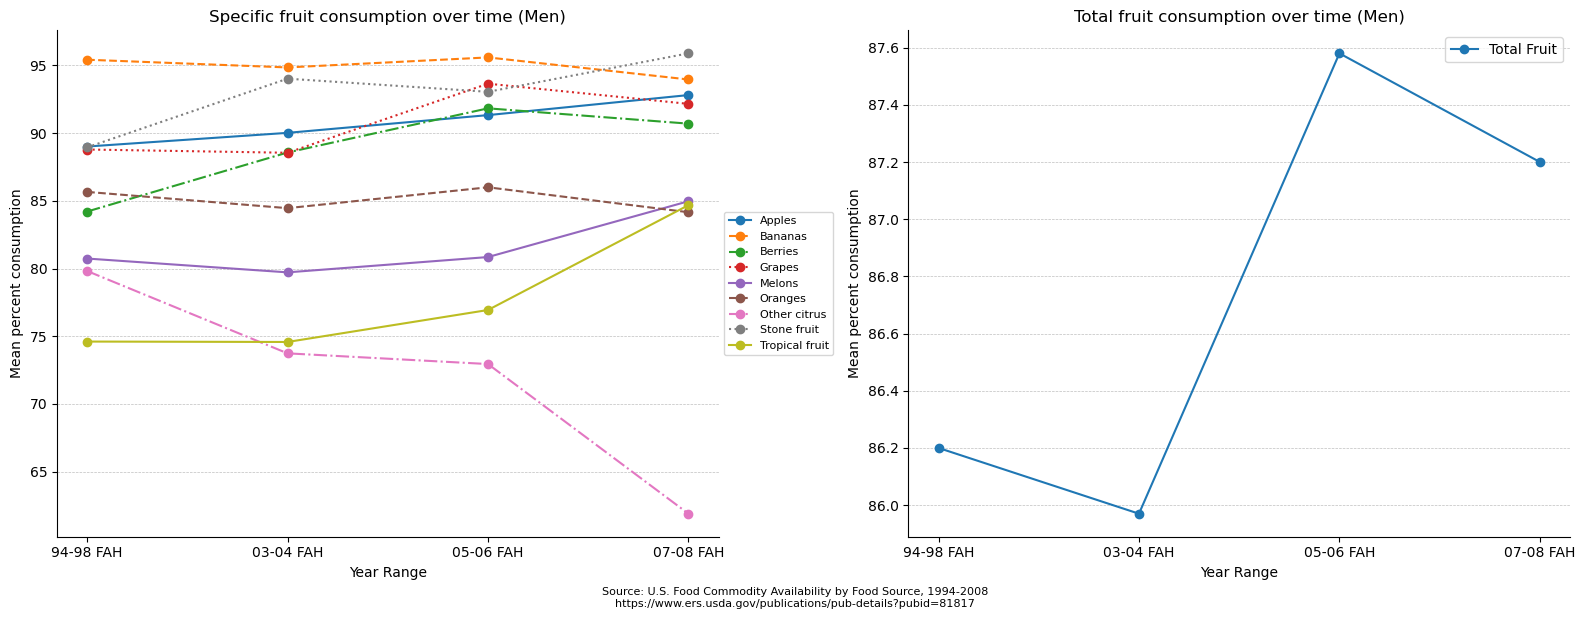

In [92]:
make_plot(fruit_men, "fruit consumption over time (Men)", "Total Fruit", "Men_mean", 0)

Trends show an overall one percent increase of male consumption of fruits over the year with sharp decline in citrus fruits and a steady increase of tropical fruits. Which shows a shift in consumer preferences rather than an overall dietary change.

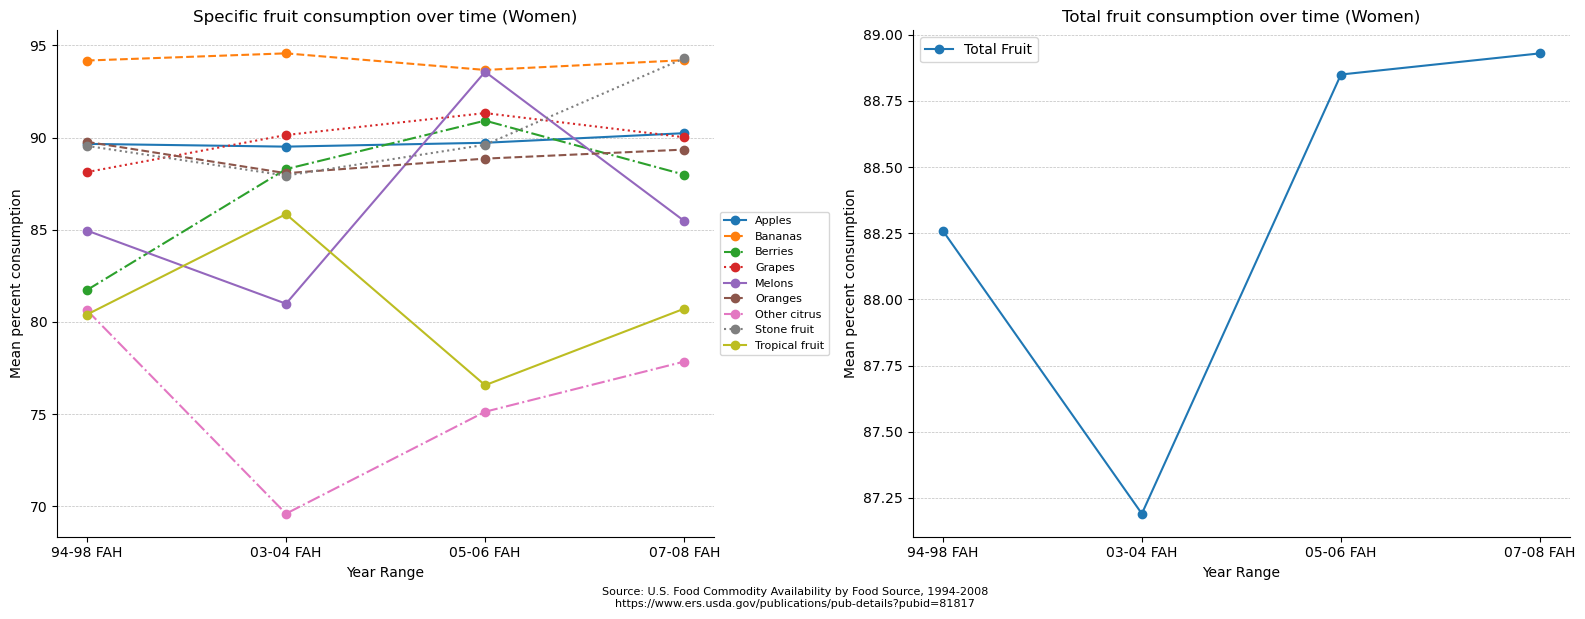

In [93]:
make_plot(fruit_women, "fruit consumption over time (Women)", "Total Fruit", "Women_mean", 0)

The graph shows an overall positive trend in the percent of fruit consumption in women with erratic consumer preferences of melon, citrus, and tropical fruits over the years. Akin to male preferences bananas are seen to be a staple fruit in many people's diet.

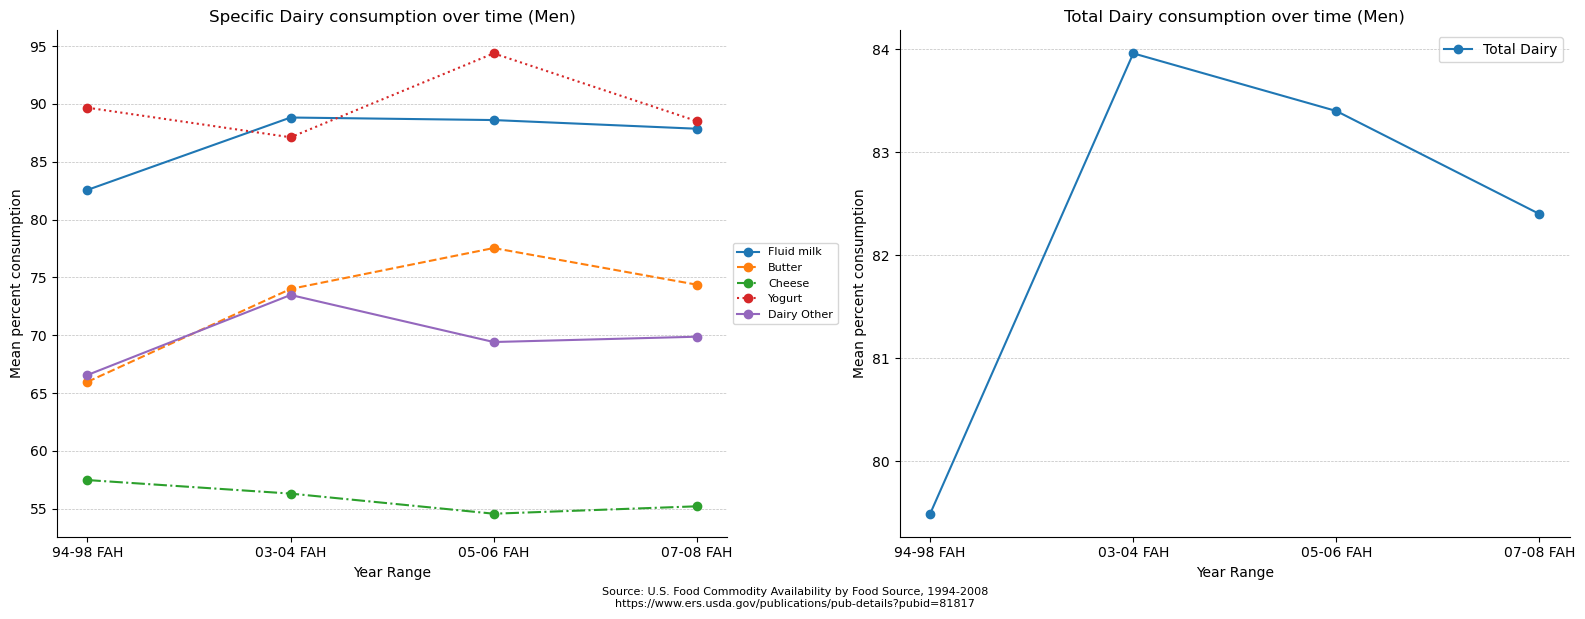

In [94]:
make_plot(dairy_men, "Dairy consumption over time (Men)", "Total Dairy", "Men_mean", 30)

Overall male consumption of dairy products have increased which can be due to an increase in consumption for all dairy products except cheese which remained low for all years.

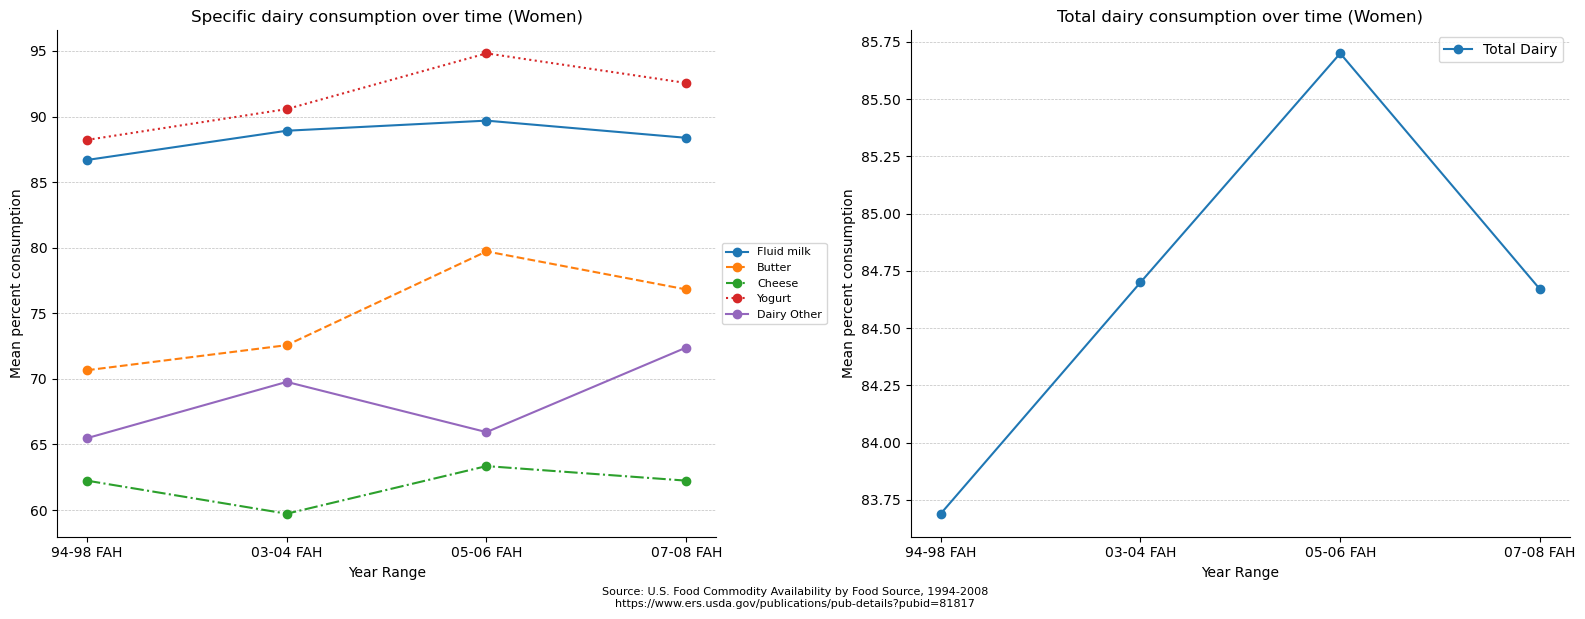

In [95]:
make_plot(dairy_women, "dairy consumption over time (Women)", "Total Dairy", "Women_mean", 30)

Female dairy consumption has consistently increased over the years with an exception to cheese which similar to male consumption has remained low.